# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# DONE: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# DONE: Number of training examples
n_train = X_train.shape[0]

# DONE: Number of testing examples.
n_test = X_test.shape[0]

# DONE: What's the shape of an traffic sign image?
image_shape = X_train[0, :, :, :].shape

# DONE: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

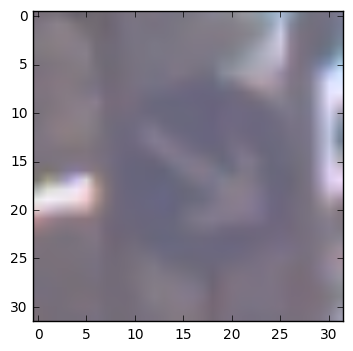

In [3]:
### Code block to visualize a random sample of a particular sign
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
test = X_train[y_train == 38]
plt.imshow(test[152,:,:,:])

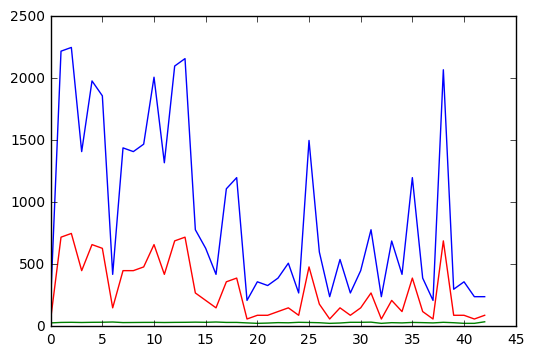

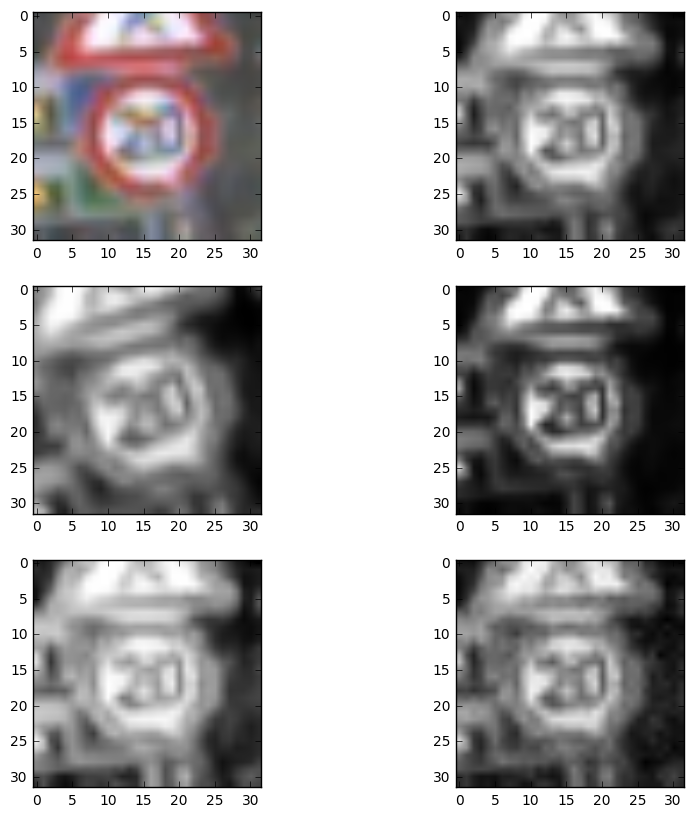

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import cv2

## Plot the count of each class in each dataset to check how unbalanced they are:
count_train = np.zeros(n_classes)
count_test = np.zeros(n_classes)
count_ratio = np.zeros(n_classes)
for label in np.unique(y_train):
    count_train[label] = y_train[y_train == label].shape[0]
    count_test[label] = y_test[y_test == label].shape[0]
    count_ratio[label] = count_test[label]*1./count_train[label]

plt.figure()
plt.plot(count_train, 'b', count_test, 'r', 100*count_ratio, 'g')

## Test possible techniques for preprocessing and augmenting the data:
# Show random raw image:
plt.figure(figsize=(10,10))
plt.subplot(321)
plt.imshow(X_train[0, :, :, :])

# Transform its colorspace representation from RGB to HSV:
img = cv2.cvtColor(X_train[0, :, :, :], cv2.COLOR_RGB2HSV)
plt.subplot(322)
plt.imshow(img[:, :, 2], cmap='gray')

# Select only the V channel:
img = img[:, :, 2]

# Normalize the image:
img = img/255. - 0.5

# Rotate the image 15 degrees:
rows,cols = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),15,1.2)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(323)
plt.imshow(dst, cmap='gray')

# Apply gamma compression and expansion to the image:
gamma = 0.4
img_g = (img + 0.5)**(1./gamma) - 0.5
plt.subplot(324)
plt.imshow(img_g, cmap='gray')

img_g = (img + 0.5)**(gamma/10.) - 0.5
plt.subplot(325)
plt.imshow(img_g, cmap='gray')

# Apply gaussian noise to the image:
mu = 0
sigma = 0.02
noise = np.random.randn(32, 32)*sigma + mu
img_n = img + noise

plt.subplot(326)
plt.imshow(img_n, cmap='gray')

# ----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
def preprocess(data):
    prep_data = np.ndarray(data.shape[0:3])
    for n in range(data.shape[0]):
        prep_data[n, :, :] = cv2.cvtColor(data[n, :, :, :], cv2.COLOR_RGB2HSV)[:, :, 2]
    prep_data = prep_data/255. - 0.5
    return prep_data

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

To preprocess the data, I changed the colorspace of the images from RGB to HSV and only stored the V channel. I also normalized the data so that the values of the pixels would be ranging from -0.5 to 0.5.

Data centering and normalization is common practice in image processing applications and helps to optimize the algorithm by avoiding unnecessary calculations, it helps the convnet to converge faster, and makes the weight initialization process easier (see this paper for more information on the centered vs non-centered data in machine learning debate https://arxiv.org/pdf/1407.2904.pdf).

According to wikipedia (https://en.wikipedia.org/wiki/HSL_and_HSV), the HSV colorspace is supposed to be more perceptually relevant than the RGB representation. The H and S channels are related to color differences to the primary colors. The V value is related to the brightness of each pixel, similar to the pixels in a grayscale image. In the Sermanet paper (YUV color space used), it was noted that, even though results were improved with colorless instead of colorful recognition, when analysing the test set errors a big loss of information demonstrated in some images when going colorless in the YUV representation. In the *Finding Lane Lines* the HSV representation proved to be less prone to this loss of information and keep a more detailed colorless image in its V channel, that's why I tried applying it instead of the YUV representation. 

In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

def augment_and_pickle(dataset, label):
    _,rows,cols = dataset.shape
    
    # Rotate +15 degrees:
    pos_rot_dataset = np.zeros_like(dataset)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),15,1.2)
    for i in range(dataset.shape[0]):
        img = dataset[i, :, :]
        pos_rot_dataset[i, :, :] = cv2.warpAffine(img,M,(cols,rows))

    # Rotate -15 degrees:
    neg_rot_dataset = np.zeros_like(dataset)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),-15,1.2)
    for i in range(dataset.shape[0]):
        img = dataset[i, :, :]
        neg_rot_dataset[i, :, :] = cv2.warpAffine(img,M,(cols,rows))

    dataset = np.concatenate((dataset, pos_rot_dataset, neg_rot_dataset))

    # Gamma compression and expanssion:
    gamma = 0.04
    comp_gamma_dataset = (dataset + 0.5)**(gamma) - 0.5
    gamma = 2.5
    exp_gamma_dataset = (dataset + 0.5)**(gamma) - 0.5

    dataset = np.concatenate((dataset, comp_gamma_dataset, exp_gamma_dataset))
    dataset_label = np.zeros((dataset.shape[0])) + label
    
    pickle_file = 'label' + str(label) + '.pickle'

    try:
        f = open(pickle_file, 'wb')
        save = {
            'dataset': dataset,
            'dataset_label': dataset_label,
        }
        pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
        f.close()
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

In [7]:
import os

X_train = preprocess(X_train)
print('Pickling...\n')
for label in np.unique(y_train):
    if os.path.isfile('label' + str(label) + '.pickle'):
        print('File already exists. Skipping pickling...')
    else:
        print('Pickling label: %d...' % label)
        augment_and_pickle(X_train[y_train == label], label)

Pickling...

File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. Skipping pickling...
File already exists. 

In [8]:
from sklearn.utils import shuffle

X_test = preprocess(X_test)
X_test, y_test = shuffle(X_test, y_test)

pickle_file = 'prep_test.pickle'
if os.path.isfile(pickle_file):
        print('File already exists. Skipping pickling...')
else:
    print('Pickling...')
    try:
        f = open(pickle_file, 'wb')
        save = {
            'features': X_test,
            'labels': y_test,
        }
        pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
        f.close()
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

File already exists. Skipping pickling...


In [9]:
from sklearn.model_selection import train_test_split

def draw_subset(rate_train_val = 0.7):

    for label in range(n_classes):
        pickle_file = 'label' + str(label) + '.pickle'
        try:
            with open(pickle_file, 'rb') as f:
                data = pickle.load(f)
                X_train, X_val, y_train, y_val = train_test_split(
                    data['dataset'], data['dataset_label'], test_size=(1.-rate_train_val))
                if label == 0:
                    X_train_subset = X_train
                    y_train_subset = y_train
                    X_val_subset = X_val
                    y_val_subset = y_val
                else:
                    X_train_subset = np.append(X_train_subset, X_train, axis=0)
                    y_train_subset = np.append(y_train_subset, y_train, axis=0)
                    X_val_subset = np.append(X_val_subset, X_val, axis=0)
                    y_val_subset = np.append(y_val_subset, y_val, axis=0)
        except Exception as e:
            print('Unable to process data from', pickle_file, ':', e)
            raise
    
    X_train_subset, y_train_subset = shuffle(X_train_subset, y_train_subset)
    X_val_subset, y_val_subset = shuffle(X_val_subset, y_val_subset)
    
    return X_train_subset, y_train_subset, X_val_subset, y_val_subset

# Load data
X_train, y_train, X_val, y_val = draw_subset()

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

When you take a look at the count curves demonstrated in the *Dataset Exploration Visualization* code block, you realize that, even though the number of data points are significantly different between different classes (datasets seem unbalanced - red and blue curves), the ratio between the number of data points per class in the training and testing datasets is practically constant (green curve). That indicates the training and testing datasets were drawn from the same distribution and classes with more data points are more likely than classes with fewer data points. For this reason, this ratio should be kept when splitting the training dataset into a training and a validation datasets, since it carries information about the likelihood of the traffic signs.

When augmenting the data, I took the *Traffic Sign Recognition with Multi-Scale Convolution Networks* paper by Pierre Sermanet and Yann LeCun as my main reference. In the paper, they applied transformations in position, in scale and rotation of the images. In my data, I applied: rotation transforms (+15 and -15 degrees); and gamma compression and expansion (see this link for more information: https://en.wikipedia.org/wiki/Gamma_correction). I also tried adding gaussian noise to the images (see the last image in the *Dataset Exploration Visualization* code block), but decided not to use it due to memory limitations in my PC. With these transformations, I increased the number of data points in the training dataset from 39209 to 352881 (9x) and still maintained the ratio between the number of examples between classes.

Taking that into consideration, I went through the pickle files with the augmented data and, using the *train_test_split* function from the *sklearn.model_selection* module, I split the trainig dataset into a training and a validation datasets with a ratio of 70/30, respectively.

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# InceptNet architecture:
# INPUT -> 1X1 -> ACT -> 3X3 -> ACT -> POOL -> 6X6 -> ACT -> POOL -> 5X5(RESHAPE)-,
#                                           '->     POOL -> 8X8(RESHAPE)   -> CONCAT -> FC -> ACT -> FC -> ACT -> LOGITS
#
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper with bias
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return x

def maxpool2d(x, k=2):
    return tf.nn.max_pool( x, ksize=[1, k, k, 1],
        strides=[1, k, k, 1], padding='SAME')

def InceptNet(x, weights, biases):
    
    x = tf.reshape(x, (-1, 32, 32, 1))
        
    # Convolution 1x1 layer 1 - 32*32*1 to 32*32*10
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    # ReLu activation function
    conv1 = tf.nn.relu(conv1)
    
    # Convolution 3x3 layer 2 - 32*32*10 to 30*30*20
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    # ReLu activation function
    conv2 = tf.nn.relu(conv2)
    # Pooling layer 2 - 30*30*20 to 15*15*20
    conv2 = maxpool2d(conv2)
    
    # Convolution 6x6 layer 3 branch 1 - 15*15*20 to 10*10*25
    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    # ReLu activation function
    conv3 = tf.nn.relu(conv3)
    # Pooling layer 3 branch 1 - 10*10*25 to 5*5*25
    conv3 = maxpool2d(conv3)
    
    # Pooling layer 3 branch 2 - 15*15*20 to 8*8*20
    conv2_branch = maxpool2d(conv2)
    
    # Layer 4 branch 1 - flattenning layer 3 branch 1 - 5*5*25 to 150
    flt1 = conv2d(conv3, weights['flatten_1'], biases['flatten_1'])
    flt1 = tf.nn.relu(flt1)
    flt1 = tf.reshape(flt1, (-1, layer_width['flatten_1']))
    
    # Layer 4 branch 2 - flattenning layer 3 branch 2 - 8*8*20 to 150
    flt2 = conv2d(conv2_branch, weights['flatten_2'], biases['flatten_2'])
    flt2 = tf.nn.relu(flt2)
    flt2 = tf.reshape(flt2, (-1, layer_width['flatten_2']))
    
    # Stack flattened layers together - 150 + 150
    flt = tf.concat(1, [flt1, flt2])
    
    # 1st Fully connected layer - 300 to 200
    fc1 = tf.add(tf.matmul(flt, weights['fully_connected_1']), biases['fully_connected_1'])
    # ReLu activation function
    fc1 = tf.nn.relu(fc1)
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # 2nd Fully connected layer - 200 to 100
    fc2 = tf.add(tf.matmul(fc1, weights['fully_connected_2']), biases['fully_connected_2'])
    # ReLu activation function
    fc2 = tf.nn.relu(fc2)
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Final fully connected layer - 100 to 43
    out = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    
    return out

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

For the final architecture, I took the Sermanet and LeCun paper and the LeNet-5 model as my main references. I also used some of the tips provided in the *Going deeper with convolutions* paper (GoogLeNet paper -  https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf), like using 1x1 convolutions and using average pooling to change from convnets to fully connected ones instead of flattening the filters.

My final architecture looks as follows:

Layer 1:
    - 1x1 convolution - 32*32*1 to 32*32*10
    - ReLu activation
Layer 2:
    - 3x3 convolution - 32*32*10 to 30*30*20
    - ReLu activation
    - Maxpooling - 30*30*20 to 15*15*20
Layer 3 branch 1:
    - 6x6 convolution - 15*15*20 to 10*10*25
    - ReLu activation
    - Maxpooling - 10*10*25 to 5*5*25
Layer 3 branch 2:
    - Maxpooling - 15*15*20 to 8*8*20
Layer 4 branch 1:
    - 5x5 convolution - 5*5*25 to 1*1*200
    - ReLu activation
    - reshape to (200,) array
Layer 4 branch 2:
    - 8x8 convolution - 8*8*20 to 1*1*100
    - ReLu activation
    - reshape to (100,) array
Fully connected layer 1:
    - Concatenate layer 4 branches 1 and 2 into a (300,) array
    - Linear layer - (300,) to (200,)
    - ReLu activation
    - 50% dropout
Fully connected layer 2:
    - Linear layer - (200,) to (100,)
    - ReLu activation
    - 50% dropout
Final fully connected layer:
    - Linear layer - (100,) to (43,)
    
Some important details:

The branching in layer 3 is related to the *multi-scale feature architecture* described in the Sermanet paper. You can see some similarity in this architecture and the inception module described in the GoogLeNet paper (hence the *InceptNet* name). Also, instead of running an average pooling to flatten the filters, I ran a single patch convolution to increase the width of the network, but still use less parameters than the full flattened filters.

In [11]:
### Train your model here.
### Feel free to use as many code cells as needed.

EPOCHS = 30
BATCH_SIZE = 100

mu = 0
sigma = 0.1

layer_width = {
    'layer_1': 10,
    'layer_2': 20,
    'layer_3': 25,
    'flatten_1': 150,
    'flatten_2': 150,
    'fully_connected_1': 200,
    'fully_connected_2': 100 }
    
weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
            shape=(1, 1, 1, layer_width['layer_1']), mean=mu, stddev=sigma)),
    'layer_2': tf.Variable(tf.truncated_normal(
            shape=(3, 3, layer_width['layer_1'], layer_width['layer_2']), mean=mu, stddev=sigma)),
    'layer_3': tf.Variable(tf.truncated_normal(
            shape=(6, 6, layer_width['layer_2'], layer_width['layer_3']), mean=mu, stddev=sigma)),
    'flatten_1': tf.Variable(tf.truncated_normal(
            shape=(5, 5, layer_width['layer_3'], layer_width['flatten_1']), mean=mu, stddev=sigma)),
    'flatten_2': tf.Variable(tf.truncated_normal(
            shape=(8, 8, layer_width['layer_2'], layer_width['flatten_2']), mean=mu, stddev=sigma)),
    'fully_connected_1': tf.Variable(tf.truncated_normal(
            shape=(300, layer_width['fully_connected_1']), mean=mu, stddev=sigma)),
    'fully_connected_2': tf.Variable(tf.truncated_normal(
            shape=(layer_width['fully_connected_1'], layer_width['fully_connected_2']), mean=mu, stddev=sigma)),
    'out': tf.Variable(tf.truncated_normal(
            shape=(layer_width['fully_connected_2'], n_classes), mean=mu, stddev=sigma)) }

biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])),
    'flatten_1': tf.Variable(tf.zeros(layer_width['flatten_1'])),
    'flatten_2': tf.Variable(tf.zeros(layer_width['flatten_2'])),
    'fully_connected_1': tf.Variable(tf.zeros(layer_width['fully_connected_1'])),
    'fully_connected_2': tf.Variable(tf.zeros(layer_width['fully_connected_2'])),
    'out': tf.Variable(tf.zeros(n_classes)) }

keep_prob = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32, (None, 32, 32))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

logits = InceptNet(x, weights, biases)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y))
opt = tf.train.AdamOptimizer(learning_rate=0.0005, epsilon=0.001)
train_op = opt.minimize(loss_op)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [12]:
### Given a dataset as input returns the loss and accuracy.

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_acc, total_loss = 0, 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, acc = sess.run([loss_op, accuracy_op], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_acc += (acc * batch_x.shape[0])
        total_loss += (loss * batch_x.shape[0])
    return total_loss/num_examples, total_acc/num_examples

In [13]:
train_loss_hist = np.zeros(EPOCHS)
train_acc_hist = np.zeros(EPOCHS)
val_loss_hist = np.zeros(EPOCHS)
val_acc_hist = np.zeros(EPOCHS)

EPOCH 1 ...
EPOCH 11 ...
EPOCH 21 ...
Trained Model Saved.



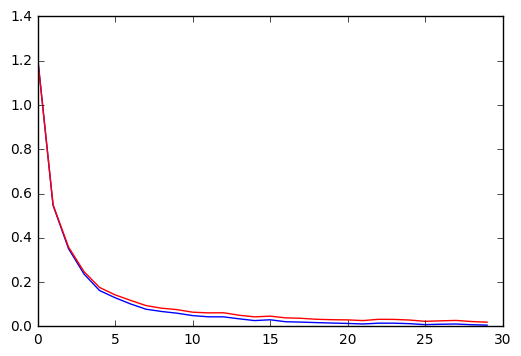

In [14]:
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Train model
    for i in range(EPOCHS):
        
        #X_train, y_train = shuffle(X_train_subset, y_train_subset)
        num_examples = X_train.shape[0]
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(train_op, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        if i%10 == 0:
            print("EPOCH {} ...".format(i+1))
        train_loss, train_acc = evaluate(X_train, y_train)
        train_loss_hist[i] = train_loss
        train_acc_hist[i] = train_acc
        #print("Train loss = {:.3f}".format(train_loss))
        #print("Train accuracy = {:.3f}".format(train_acc))
        val_loss, val_acc = evaluate(X_val, y_val)
        val_loss_hist[i] = val_loss
        val_acc_hist[i] = val_acc
        #print("Validation loss = {:.3f}".format(val_loss))
        #print("Validation accuracy = {:.3f}".format(val_acc))
        #print()
        
    # Save the model
    saver.save(sess, os.path.join(os.getcwd(), 'train_model_aws'))
    print('Trained Model Saved.\n')
        
plt.plot(train_loss_hist, 'b', val_loss_hist, 'r')

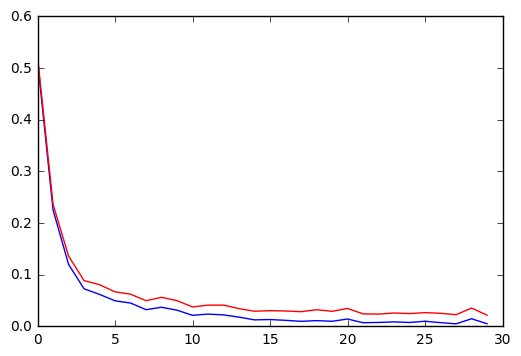

In [15]:
plt.plot(train_loss_hist, 'b', val_loss_hist, 'r')

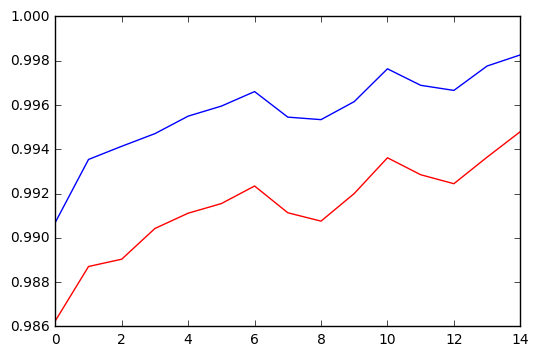

In [15]:
plt.plot(train_acc_hist[15:], 'b', val_acc_hist[15:], 'r')

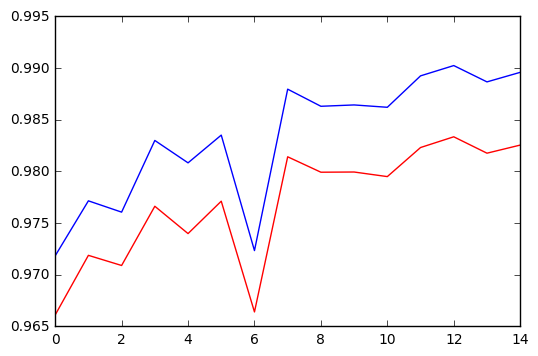

In [17]:
plt.plot(train_acc_hist[5:], 'b', val_acc_hist[5:20], 'r')

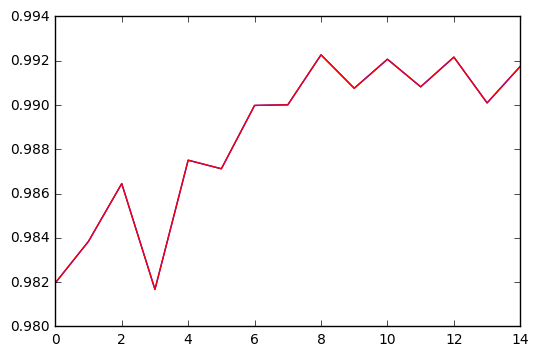

In [22]:
break
plt.plot(val_acc_hist[5:], 'b', val_acc_hist_1[5:20], 'r')

In [18]:
train_loss_hist_1 = train_loss_hist
train_acc_hist_1 = train_acc_hist
val_loss_hist_1 = val_loss_hist
val_acc_hist_1 = val_acc_hist

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

For this model, I tried to follow the guidelines demonstrated in Stanford's *CS231n Winter 2016* class (see: https://www.youtube.com/playlist?list=PLkt2uSq6rBVctENoVBg1TpCC7OQi31AlC).

For the number of epochs and the batch size, I tested a few different values until I found out a good combination considering the hardware limitations of my PC.

I initialized the weights randomly (naively drawn from a truncated gaussian distribution with 0 mean and 0.1 std), given that the network wasn't deep enough to justify using fancier initialization methods such as Xavier 2.

For the optimizer, I chose Adam. From Lecture 6 of Stanford's class, I realized the default parameters on tf (learning_rate = 0.001, beta1 = 0.9, beta2 = 0.999 and epsilon = 1e-08) were probably good enough and since I've got great results with them from the beginning, I didn't try changing them.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

As I mentioned on *Question 3*, my main reference was the Sermanet paper, since it was one of the firsts to approach the *Traffic Sign Classification* competition with a convnet and it demonstrated really good results with error rates bellow 2%. 

So I started with the LeNet-5 network and added some modifications according to the guidelines described in the Sermanet paper, the GoogLeNet paper and the CS231n class notes. First I added the 1x1 convolutions as suggested by Vincent in Udacity's Deep Learning class, and changed the 5x5 convolutions to 3x3 ones (because I wanted to minimize the number of parameters to train, but still get a reasonable error rate). For the widhts of the convnets, I first used the values I had previously used in my MNIST solution, but later had to increase them to get better results. I also changed the second convnet from a 3x3 to a 6x6 to avoid zero padding in the hidden layers of the network. I, then, branched out the first maxpooling layer and concatenated it with the output of a later layer (Multi-Scale Feature Architecture explained in the Sermanet paper). At the end, I also changed the flatten process for the fully connected layers and applied single patch convolutions also to decrease the number of parameters needed in the fully connected layers (see *Question 3* - parameter optimization mentioned in the GoogLeNet paper).

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

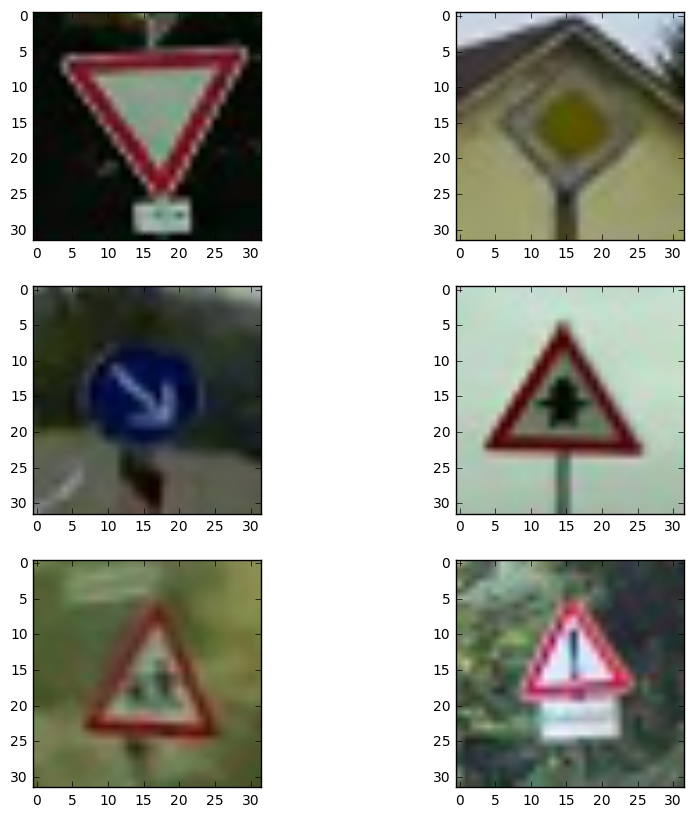

In [21]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
plt.figure(figsize=(10,10))
unkown_img = np.zeros((6, 32, 32))
for i in range(6):
    img = cv2.imread('new images/sign' + str(i+1) + '.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    unkown_img[i, :, :] = preprocess(np.array([img]))
    plt.subplot(321 + i)
    plt.imshow(img)

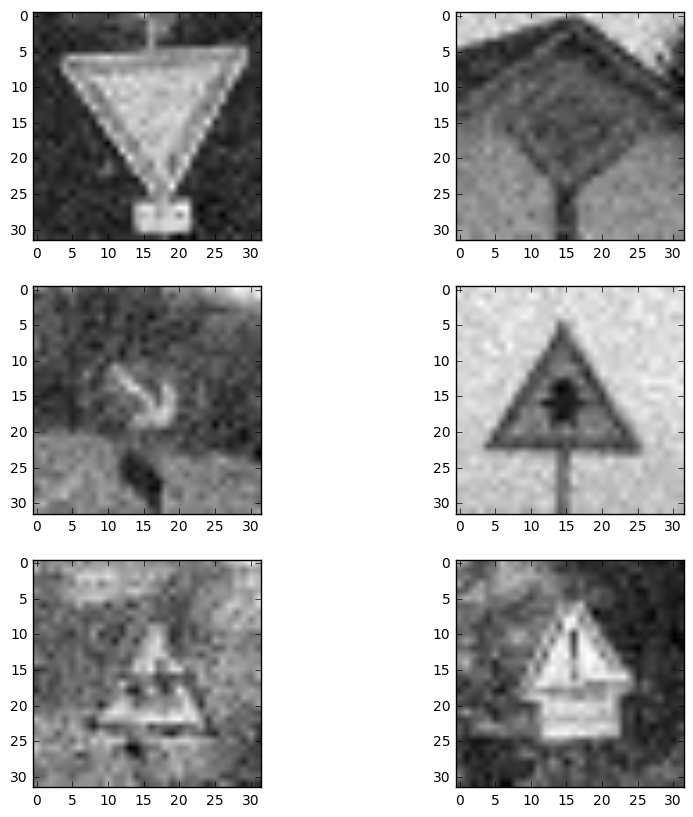

In [23]:
plt.figure(figsize=(10,10))
for i in range(6):
    img = unkown_img[i, :, :]
    
    # Apply gaussian noise to the image:
    mu = 0
    sigma = 0.05
    noise = np.random.randn(32, 32)*sigma + mu
    img += noise
    
    plt.subplot(321 + i)
    plt.imshow(img, cmap='gray')

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The colored images showed above were taken from random videos on YouTube. They correspond to the following german traffic signs:
    - Yield or Give way (id: 13)
    - Priority road (id: 12)
    - Keep right (id: 38)
    - Right of way at the next intersection (id: 11)
    - Children crossing (id: 28)
    - General caution (id: 18)

The original images don't have any particular qualities that might make their classification difficult, so I added gaussian noise to them to make it harder for my classifier.

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.